In [40]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from statsmodels.stats.descriptivestats import describe

In [2]:
warnings.filterwarnings("ignore")
plt.style.use("data/custom.mplstyle")

In [3]:
losses = [34, 34, 46, 46, 36, 47, 51, 53, 51, 41, 36, 32, 51, 40, 39, 42, 48, 32, 41, 39, 44, 39, 25, 40, 36, 26, 32, 19, 54, 57, 49, 47, 54, 69, 56, 52, 25, 32, 30, 45, 35, 29]
wins = [48, 48, 36, 36, 46, 35, 31, 29, 31, 41, 46, 50, 31, 42, 43, 40, 34, 50, 41, 43, 38, 43, 57, 42, 46, 56, 50, 31, 28, 25, 33, 35, 28, 13, 26, 30, 57, 50, 52, 37, 47, 53]

def stem_and_leaf(data, title, reverse=False):
  stems = {}
  for number in data:
      stem, leaf = divmod(number, 10)
      if stem not in stems:
          stems[stem] = []
      stems[stem].append(leaf)

  print("-------------")
  print(f" {title}")
  print("-------------")
  print(" Stem | Leaf")
  print("-------------")
  for stem in sorted(stems):
      leaf_str = " ".join(map(str, sorted(stems[stem], reverse=reverse)))
      print(f" {stem} | {leaf_str}")

stem_and_leaf(losses, "Losses", reverse=True)
stem_and_leaf(wins, "Wins")

-------------
 Losses
-------------
 Stem | Leaf
-------------
 1 | 9
 2 | 9 6 5 5
 3 | 9 9 9 6 6 6 5 4 4 2 2 2 2 0
 4 | 9 8 7 7 6 6 5 4 2 1 1 0 0
 5 | 7 6 4 4 3 2 1 1 1
 6 | 9
-------------
 Wins
-------------
 Stem | Leaf
-------------
 1 | 3
 2 | 5 6 8 8 9
 3 | 0 1 1 1 1 3 4 5 5 6 6 7 8
 4 | 0 1 1 2 2 3 3 3 6 6 6 7 8 8
 5 | 0 0 0 0 2 3 6 7 7


In [69]:
def lineplot(data, x=None, y=None, color="#5153A4"):
  ax = sns.lineplot(data=data, x=x, y=y, color=color)

  for line in ax.lines:
      line.set_marker("s")
      line.set_markersize(6)
      line.set_markeredgecolor(color)
  
  return ax

def multilineplot(data, x=None, y=None, hue=None, legend_title=""):
  ax = sns.lineplot(data=data, x=x, y=y, hue=hue, palette="colorblind")

  for line in ax.lines:
      line.set_marker("s")
      line.set_markersize(6)
      line.set_markeredgecolor(line.get_color())
  
  ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x / 1e3)} K"))
  ax.legend(title=legend_title, bbox_to_anchor=(1.05, 0.5), loc="center left", frameon=True, edgecolor="#333", facecolor="white", title_fontproperties={"weight": "bold"})

  return ax

def barplot(data, x=None, y=None, width=0.8):
  ax = sns.barplot(data=data, x=x, y=y, width=width, edgecolor="#333", linewidth=1.3)
  return ax

def histplot(data, x=None, stat="count", n_bins=None, precision=None, bin_edges=None):
  if bin_edges is None:
    min_val = data[x].min() - precision
    max_val = data[x].max() + precision
    bin_width = round((max_val - min_val) / n_bins)
    bin_edges = []

    edge = min_val
    bin_edges.append(edge)

    while edge < max_val:
      edge += bin_width
      bin_edges.append(edge)

  ax = sns.histplot(data=data, x=x, stat=stat, bins=bin_edges, edgecolor="#333", linewidth=1.3)
  ax.set_xticks(bin_edges, bin_edges)
  
  return ax

def freqplot(data, x=None, y=None):
  ax = lineplot(data=data, x=x, y=y)
  ax.set_xticks(data[x], data[x])
  return ax

def boxplot(data, x=None, y=None, width=0.8):
  flierprops = {
    "marker": "o",
    "markerfacecolor": "black",
    "markeredgecolor": "black"
  }
  medianprops = {
    "color": "black",
    "linewidth": 2
  }

  ax = sns.boxplot(data=data, x=x, y=y, width=width, flierprops=flierprops, medianprops=medianprops, showcaps=False)
  return ax

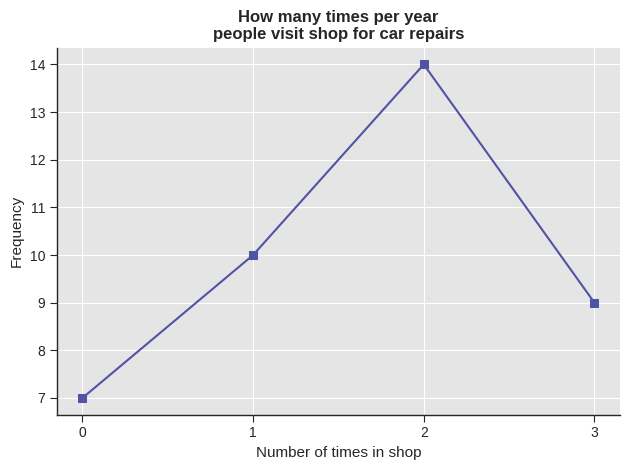

In [70]:
df = pd.DataFrame({
  "shop_visits": [0, 1, 2, 3],
  "frequencies": [7, 10, 14, 9]
})

ax = lineplot(data=df, x="shop_visits", y="frequencies")

ax.set_xticks([0, 1, 2, 3], [0, 1, 2, 3])
ax.set_title("How many times per year\npeople visit shop for car repairs")
ax.set_xlabel("Number of times in shop")
ax.set_ylabel("Frequency")

plt.savefig("data/2-4.png")
plt.show()


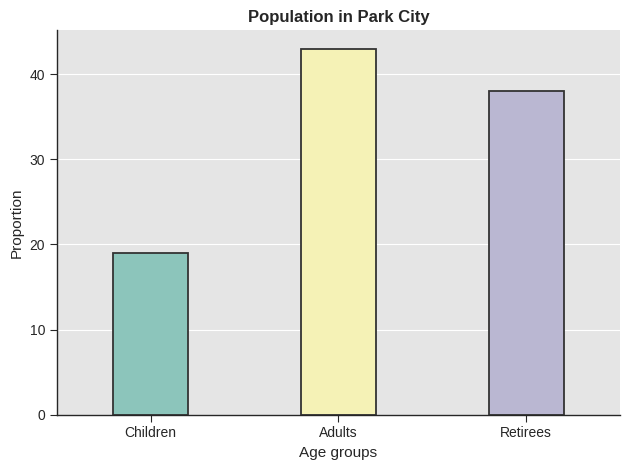

In [71]:
df = pd.DataFrame({
  "age_groups": ["Children", "Adults", "Retirees"],
  "proportion": [19, 43, 38],
})

ax = barplot(data=df, x="age_groups", y="proportion", width=0.4)

ax.set_title("Population in Park City")
ax.set_xlabel("Age groups")
ax.set_ylabel("Proportion")

plt.savefig("data/2-5.png")
plt.show()

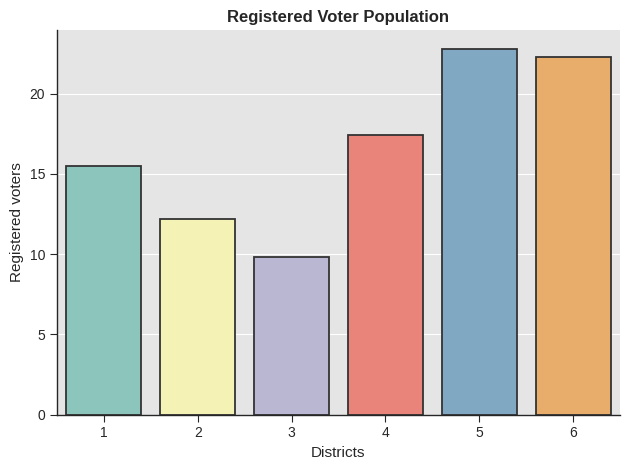

In [72]:
df = pd.DataFrame({
  "districts": [1, 2, 3, 4, 5, 6],
  "registered_voters": [15.5, 12.2, 9.8, 17.4, 22.8, 22.3]
})

ax = barplot(data=df, x="districts", y="registered_voters")
ax.set_title("Registered Voter Population")
ax.set_xlabel("Districts")
ax.set_ylabel("Registered voters")

plt.savefig("data/2-6.png")
plt.show()

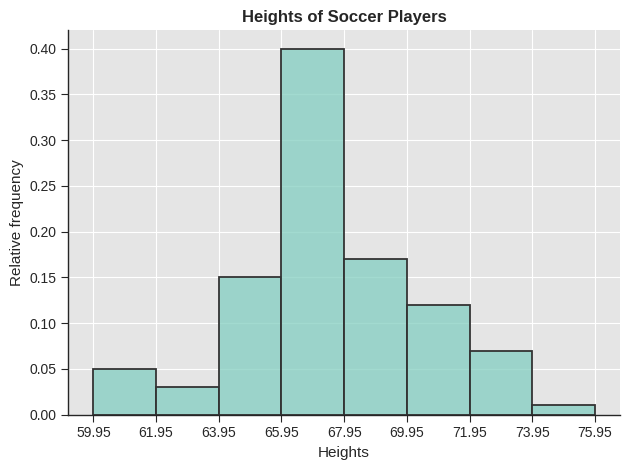

In [73]:
df = pd.DataFrame({
  "heights": [60, 60.5, 61, 61, 61.5, 63.5, 63.5, 63.5, 64, 64, 64, 64, 64, 64, 64, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 64.5, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66.5, 66.5, 66.5, 66.5, 66.5, 66.5, 66.5, 66.5, 66.5, 66.5, 66.5, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67.5, 67.5, 67.5, 67.5, 67.5, 67.5, 67.5, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69.5, 69.5, 69.5, 69.5, 69.5, 70, 70, 70, 70, 70, 70, 70.5, 70.5, 70.5, 71, 71, 71, 72, 72, 72, 72.5, 72.5, 73, 73.5, 74]
})

ax = histplot(data=df, x="heights", stat="proportion", n_bins=8, precision=0.05)

ax.set_title("Heights of Soccer Players")
ax.set_xlabel("Heights")
ax.set_ylabel("Relative frequency")
plt.show()

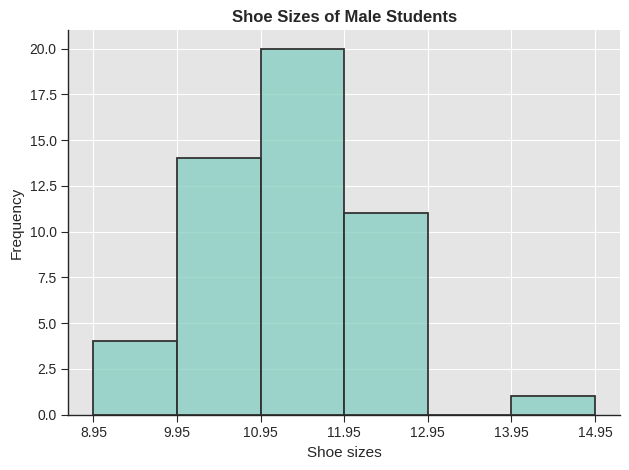

In [74]:
df = pd.DataFrame({
  "shoe_sizes": [9, 9, 9.5, 9.5, 10, 10, 10, 10, 10, 10, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 12, 12, 12, 12, 12, 12, 12, 12.5, 12.5, 12.5, 12.5, 14]
})

ax = histplot(data=df, x="shoe_sizes", stat="frequency", n_bins=6, precision=0.05)

ax.set_title("Shoe Sizes of Male Students")
ax.set_xlabel("Shoe sizes")
ax.set_ylabel("Frequency")

plt.savefig("data/2-7.png")
plt.show()

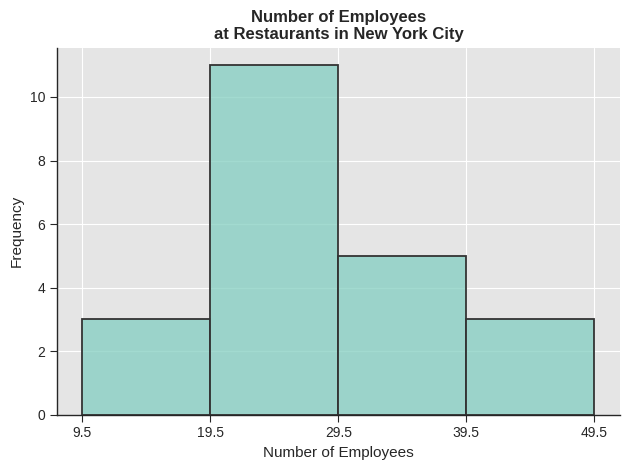

In [75]:
df = pd.DataFrame({
  "employees": [22, 35, 15, 26, 40, 28, 18, 20, 25, 34, 39, 42, 24, 22, 19, 27, 22, 34, 40, 20, 38, 28]
})

bin_edges = [9.5, 19.5, 29.5, 39.5, 49.5]

ax = histplot(data=df, x="employees", stat="count", bin_edges=bin_edges)

ax.set_title("Number of Employees\nat Restaurants in New York City")
ax.set_xlabel("Number of Employees")
ax.set_ylabel("Frequency")

plt.savefig("data/2-9.png")
plt.show()

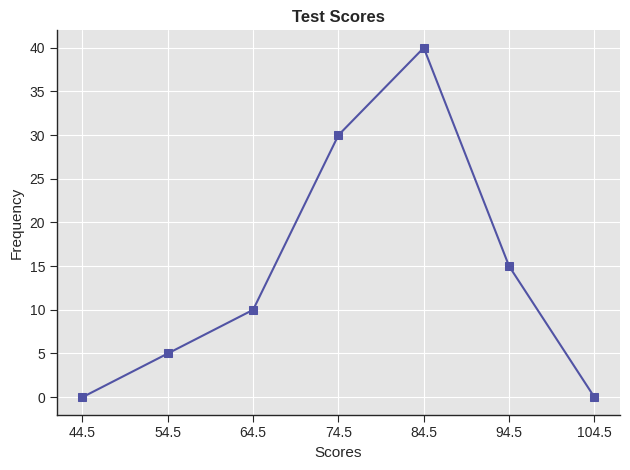

In [76]:
df = pd.DataFrame({
  "midpoints": [44.5, 54.5, 64.5, 74.5, 84.5, 94.5, 104.5],
  "frequencies": [0, 5, 10, 30, 40, 15, 0]
})

ax = freqplot(data=df, x="midpoints", y="frequencies")

ax.set_title("Test Scores")
ax.set_xlabel("Scores")
ax.set_ylabel("Frequency")

plt.show()

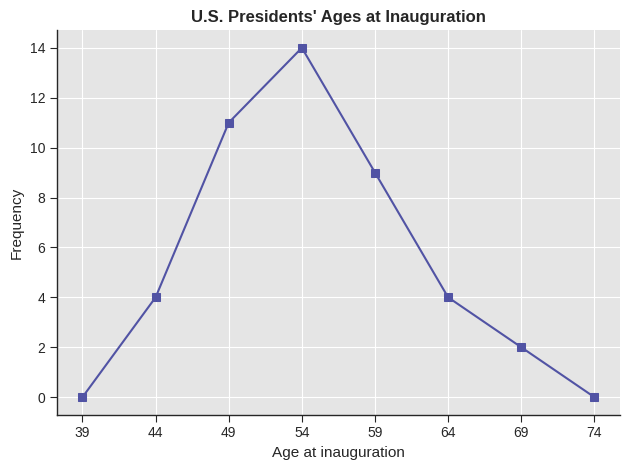

In [77]:
df = pd.DataFrame({
  "midpoints": [39, 44, 49, 54, 59, 64, 69, 74],
  "frequencies": [0, 4, 11, 14, 9, 4, 2, 0]
})

ax = freqplot(data=df, x="midpoints", y="frequencies")

ax.set_title("U.S. Presidents' Ages at Inauguration")
ax.set_xlabel("Age at inauguration")
ax.set_ylabel("Frequency")

plt.savefig("data/2-10.png")
plt.show()

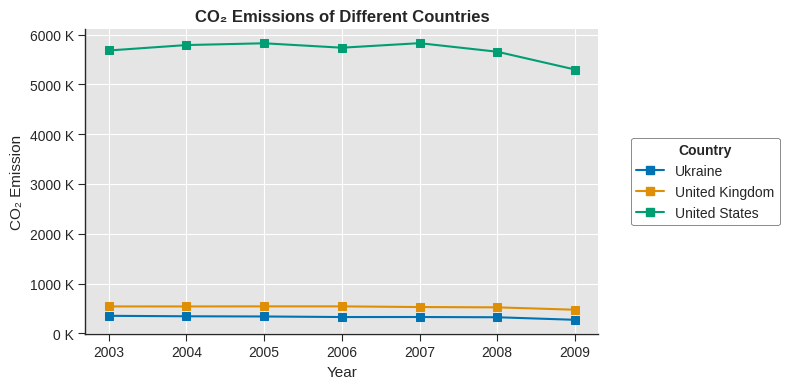

In [78]:
df = pd.DataFrame({
  "year": [
    2003, 2004, 2005, 2006, 2007, 2008, 2009,
    2003, 2004, 2005, 2006, 2007, 2008, 2009,
    2003, 2004, 2005, 2006, 2007, 2008, 2009
    ],
  "country": [
    "Ukraine", "Ukraine", "Ukraine", "Ukraine", "Ukraine", "Ukraine", "Ukraine",
    "United Kingdom", "United Kingdom", "United Kingdom", "United Kingdom", "United Kingdom", "United Kingdom", "United Kingdom",
    "United States", "United States", "United States", "United States", "United States", "United States", "United States"
    ],
  "emission": [
    352259, 343121, 339029, 327797, 328357, 323657, 272176,
    540640, 540409, 541990, 542045, 528631, 522247, 474579,
    5681664, 5790761, 5826394, 5737615, 5828697, 5656839, 5299563
  ]
})

plt.figure(figsize=(8, 4))
ax = multilineplot(data=df, x="year", y="emission", hue="country", legend_title="Country")

ax.set_title("CO₂ Emissions of Different Countries")
ax.set_xlabel("Year")
ax.set_ylabel("CO₂ Emission")

plt.savefig("data/2-12.png")
plt.show()

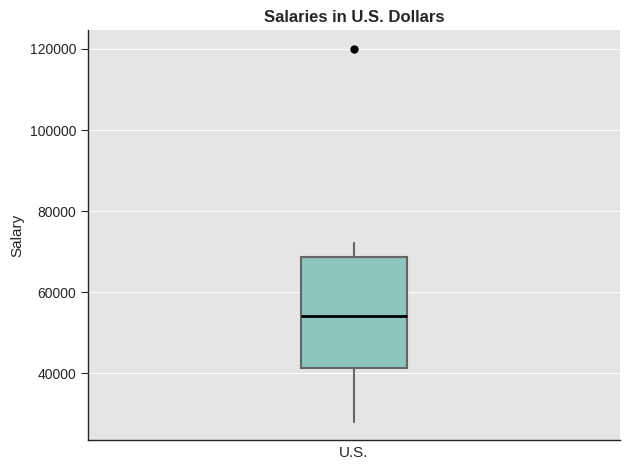

IQR: $27500.0
Outliers: $120000


In [109]:
df = pd.DataFrame({
  "salaries": [33000, 64500, 28000, 54000, 72000, 68500, 69000, 42000, 54000, 120000, 40500]
})

ax = boxplot(data=df, width=0.2)

ax.set_title("Salaries in U.S. Dollars")
ax.set_xticks([], [])
ax.set_xlabel("U.S.")
ax.set_ylabel("Salary")
plt.show()

salary_stats = describe(df)["salaries"]

iqr = salary_stats.loc["iqr"]
q1 = salary_stats.loc["25%"]
q3 = salary_stats.loc["75%"]

outlier_mask1 = df["salaries"] < (q1 - 1.5 * iqr)
outlier_mask2 = df["salaries"] > (q3 + 1.5 * iqr)

print(f"IQR: ${iqr}")

outliers = df[outlier_mask1 | outlier_mask2]
if outliers.empty:
  print("There are no outliers")
else:
  outliers = outliers.values.squeeze()
  print(f"Outliers: ${outliers}")

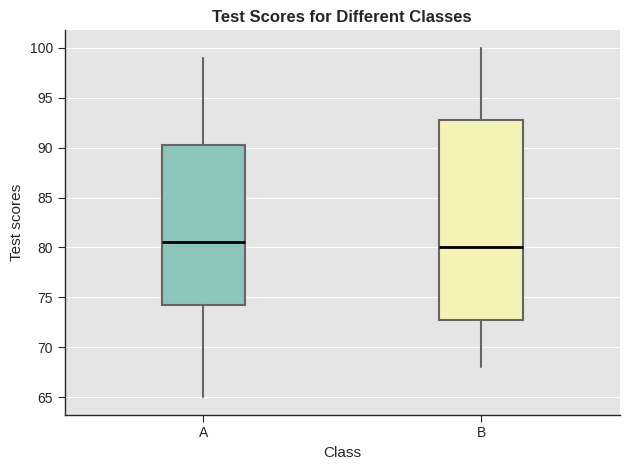

IQR of class A: 16.0
IQR of class B: 20.0


In [112]:
df = pd.DataFrame({
  "A": [69, 96, 81, 79, 65, 76, 83, 99, 89, 67, 90, 77, 85, 98, 66, 91, 77, 69, 80, 94],
  "B": [90, 72, 80, 92, 90, 97, 92, 75, 79, 68, 70, 80, 99, 95, 78, 73, 71, 68, 95, 100]
})

ax = boxplot(df, width=0.3)

ax.set_title("Test Scores for Different Classes")
ax.set_xlabel("Class")
ax.set_ylabel("Test scores")
plt.show()

iqr_A = describe(df).loc["iqr", "A"]
iqr_B = describe(df).loc["iqr", "B"]

print(f"IQR of class A: {iqr_A}")
print(f"IQR of class B: {iqr_B}")

In [142]:
a = np.concatenate((
  np.linspace(2, 2, 12),
  np.linspace(3, 3, 14),
  np.linspace(4, 4, 10),
  np.linspace(5, 5, 4)), axis=0)

print(f"65th percentile: {np.percentile(a, 65, method="midpoint")}")

65th percentile: 3.5
